In [1]:
# import scripts.control_utils as cu
from importlib import reload
import matplotlib.pyplot as plt
from annotator.midas import MidasDetector
from annotator.canny import CannyDetector
from ldm.data.util import resize_image_pil
import torch
import torchvision.transforms as tt
import numpy as np

from PIL import Image
# reload(cu)
from safetensors.torch import save_file
import glob 

torch.cuda.set_device('cuda:3')



In [2]:
import scripts.control_utils as cu
reload(cu)
import os




/export/home/ffeiden/miniconda3/envs/.pt13/lib/python3.8/site-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(


# SD 2.1

In [3]:
def load_model_from_dic (path_dic, Lora_kitti, Lora_cubes):

    config_path_depth = path_dic['yaml']
    model = cu.create_model(config_path_depth)

    ckpt = torch.load(path_dic['ckpt'], map_location='cpu')
    model.load_state_dict(ckpt['state_dict'], strict=False)

    if Lora_kitti: 
        LORA_ckpt = torch.load('/export/data/vislearn/rother_subgroup/sd15_kitti.ckpt', map_location='cpu')
        model.load_state_dict(LORA_ckpt['state_dict'], strict=False)
    if Lora_cubes: 
        LORA_ckpt = torch.load('/export/data/vislearn/rother_subgroup/sd15_simplecubes.ckpt', map_location='cpu')
        model.load_state_dict(LORA_ckpt['state_dict'], strict=False)
    
    return model.to('cuda')

def get_paths (root, yaml_path, ckpt_path):
    path_dic = {}
    path_dic['yaml'] = os.path.join(root, yaml_path)
    path_dic['ckpt'] = os.path.join(root, ckpt_path)
    return path_dic

model_paths = {}
model_paths['CNXS_0.2'] = get_paths(root='/export/data/vislearn/rother_subgroup/dzavadsk/models/training_models/v15/2023-10-28T00-52-54_v15_03p_depth_add_bs24/',
                                    yaml_path = 'configs/2023-10-28T00-52-54-project.yaml',
                                    ckpt_path = 'checkpoints/trainstep_checkpoints/45000.ckpt'
                                    )
model_paths['CNXS_1.4'] = get_paths(root='/export/data/vislearn/rother_subgroup/dzavadsk/models/training_models/v15/2023-10-28T00-49-53_v15_03p_depth_cat_bs24/',
                                    yaml_path = 'configs/2023-10-28T00-49-53-project.yaml',
                                    ckpt_path = 'checkpoints/trainstep_checkpoints/45000.ckpt'
                                    )
model_paths['CNXS_20'] = get_paths(root='/export/data/vislearn/rother_subgroup/dzavadsk/models/trained_models/ControlNet/sd/v15/midas/2023-10-31T11-53-42_cross_encD_cat_20p_depth_bs16/',
                                    yaml_path = 'configs/project.yaml',
                                    ckpt_path = 'checkpoints/trainstep_checkpoints/45000.ckpt'
                                    )
model_paths['CNXS_0.2_cubes'] = get_paths(root='/export/data/vislearn/rother_subgroup/dzavadsk/models/training_models/simpleCubes/2023-10-29T23-10-39_v15_cross_encD_cat_03p_simpleCubes_depth_bs40/',
                                    yaml_path = 'configs/2023-10-29T23-10-39-project.yaml',
                                    ckpt_path = 'checkpoints/trainstep_checkpoints/37000.ckpt'
                                    )

model = load_model_from_dic(model_paths['CNXS_0.2_cubes'], False, False)

TwoStreamControlLDM: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280,

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.14.layer_norm2.weight', 'vision_model.encoder.layers.6.layer_norm2.bias', 'vision_model.encoder.layers.20.self_attn.q_proj.bias', 'vision_model.encoder.layers.22.self_attn.q_proj.weight', 'vision_model.encoder.layers.0.self_attn.v_proj.bias', 'vision_model.encoder.layers.4.self_attn.k_proj.bias', 'vision_model.encoder.layers.23.self_attn.out_proj.weight', 'vision_model.encoder.layers.19.layer_norm1.bias', 'vision_model.encoder.layers.6.self_attn.out_proj.bias', 'vision_model.encoder.layers.3.mlp.fc1.weight', 'vision_model.encoder.layers.21.layer_norm1.weight', 'vision_model.encoder.layers.1.mlp.fc2.bias', 'vision_model.encoder.layers.22.layer_norm2.weight', 'vision_model.encoder.layers.17.self_attn.out_proj.bias', 'vision_model.encoder.layers.6.layer_norm1.bias', 'vision_model.encoder.layers.22.self_attn.out_proj.weight', 'vision_model.encod

Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is 768 and using 8 heads.
Setting up Me

In [12]:
image_root = '/export/data/ffeiden/PaperControlnetXS/512_images/'
size = 512
reload(glob)

paths = glob.glob(image_root+'*_depth*.png')

instances = []
for im_path in paths: 
    images = {}
    name = im_path.split('/')[-1]
    name, alternative = name.split('_depth')[0], name.split('_depth')[1]
    if '_alt' in alternative: 
        alternative = True
    else: 
        alternative = False
    
    image = cu.get_image(image_root + name + '.png')
    depth = Image.open(im_path)
    if not depth.mode == 'L':
        depth = depth.convert("L") 
    images['original'] = image
    # images['depth'] = np.array(depth).astype(np.float32)/255. -1.
    images['depth'] = np.abs(np.array(depth).astype(np.float32)/255. -1.)
    images['Prompt'] = name
    images['alt'] = alternative
    # print(np.min(images['depth']), np.max(images['depth']), images['depth'].shape)
    instances.append(images)


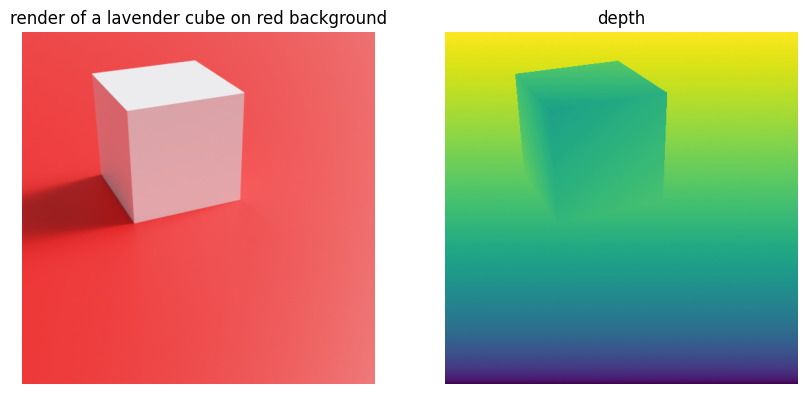

False


In [13]:
curr = instances[0] #3

plt.figure(figsize=(10, 10))


plt.subplot(121)
plt.title(curr['Prompt'])
plt.imshow(curr['original'])
plt.axis('off')

plt.subplot(122)
plt.title('depth')
plt.imshow(curr['depth'])
plt.axis('off')
plt.show()

print(curr['alt'])
# to_save = Image.fromarray(curr['depth'] * 255.).convert('RGB')
# to_save.save('/export/data/ffeiden/PaperControlnetXS/512_images/'+curr['Prompt']+'_depth.png')
# print('/export/data/ffeiden/PaperControlnetXS/512_images/'+curr['Prompt']+'_depth.png')


Global seed set to 1995


Data shape for DDIM sampling is (12, 4, 64, 64), eta 0.5
Running DDIM Sampling with 16 timesteps


DDIM Sampler: 100%|██████████| 16/16 [00:13<00:00,  1.14it/s]


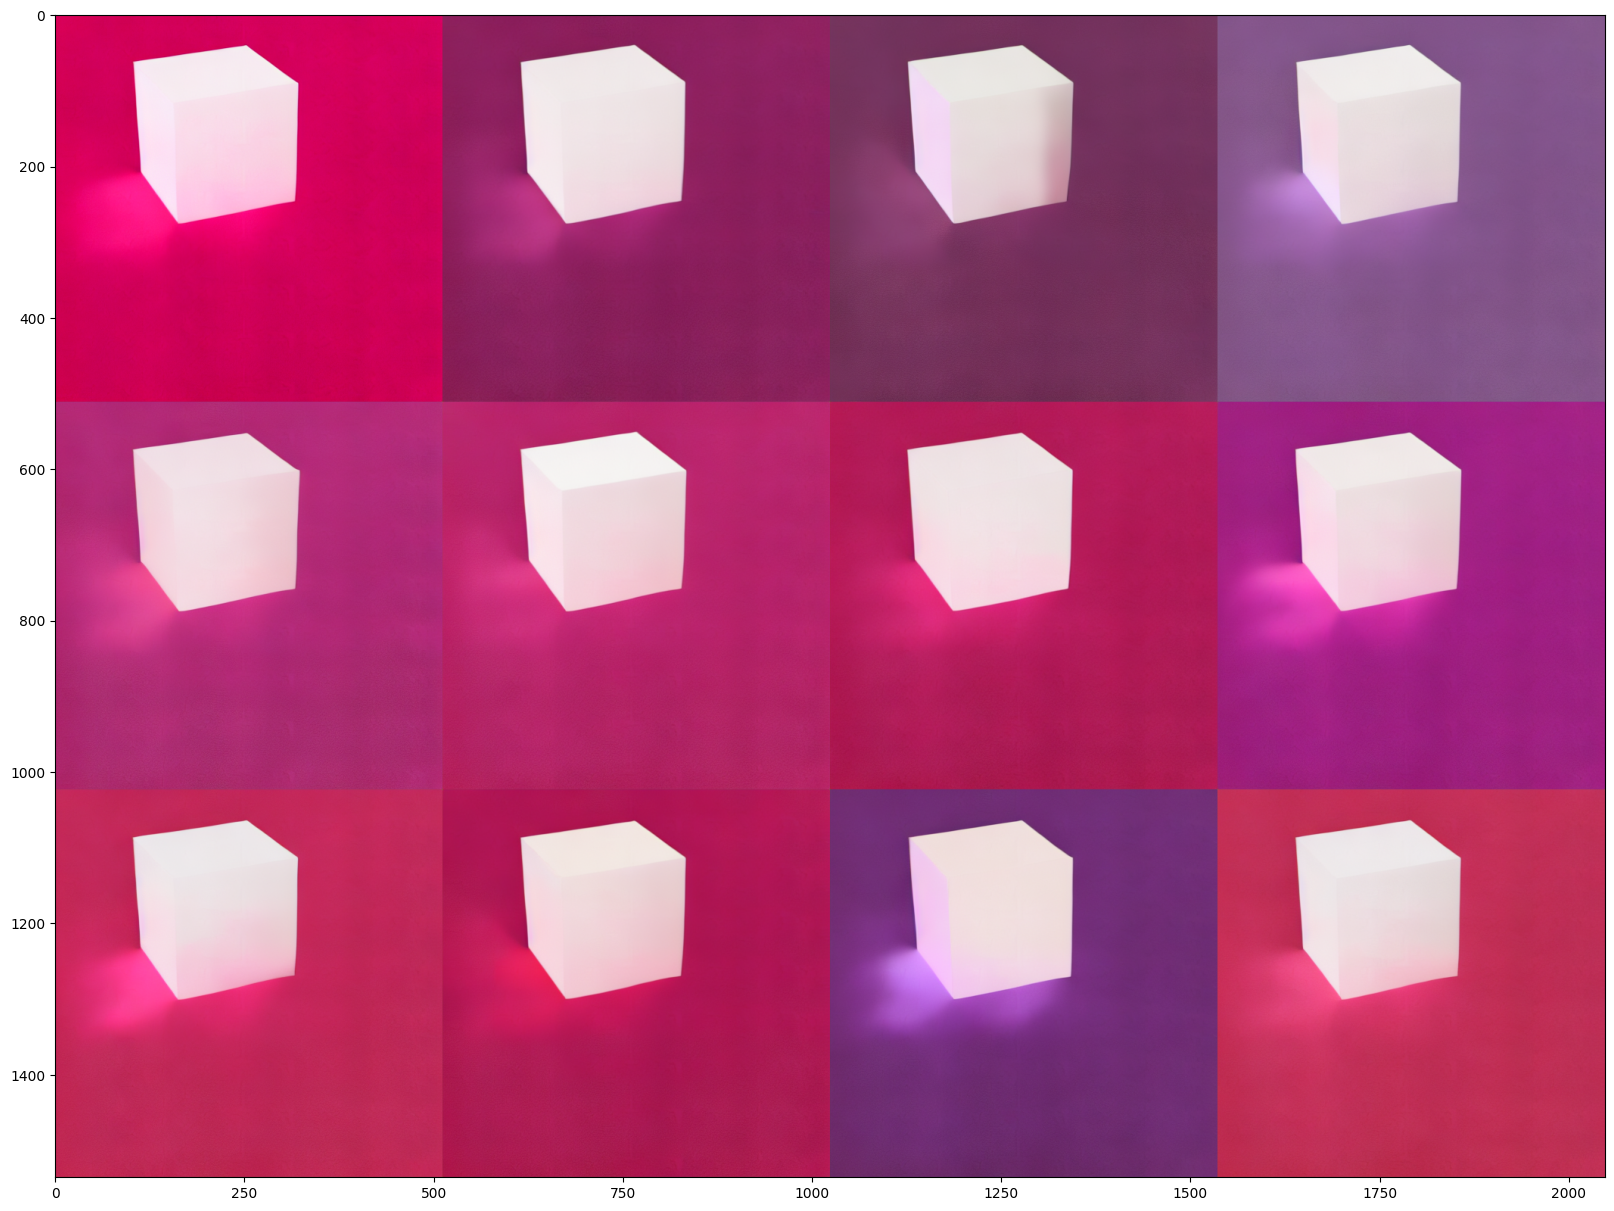

In [14]:
# reload(cu)
net = 'Samples_1_4p/'
if curr['alt']:
    sampe_name = curr['Prompt'] + '_alt'
else: 
    sampe_name = curr['Prompt']
seed = 1995

samples, controls = cu.get_sd_sample(
    guidance=curr['depth'],
    ddim_steps=15,
    num_samples=12,
    model=model,
    shape=[4, size // 8, size // 8],
    control_scale=1., # currently not working
    prompt=curr['Prompt'],
    seed=seed,
    n_prompt='', #FORGOTT TO SET TO 0
)
plt.figure(figsize=(20, 20))
plt.imshow(cu.create_image_grid(samples))

# to_save = Image.fromarray(cu.create_image_grid(samples))
# to_save.save('/export/data/ffeiden/PaperControlnetXS/'+net+sampe_name+'_grid_seed'+str(seed)+'.png')

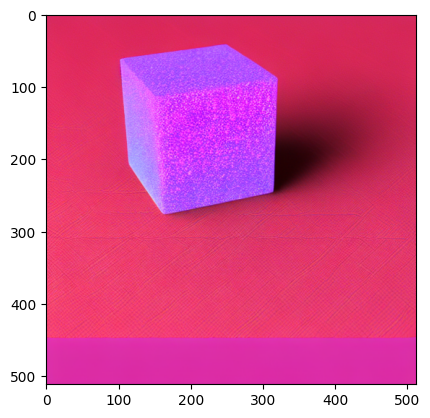

In [46]:

sample_idx = 2


good = samples[sample_idx]


plt.imshow(good)
plt.show()

to_save = Image.fromarray(good)
to_save.save('/export/data/ffeiden/PaperControlnetXS/'+net+sampe_name+'_sample'+str(sample_idx)+'.png')

In [ ]:
### Automate sampling ###
net = 'CNXS_0.2_110/'
choosen = 'Choosen_CNXS_0.2_110/'

for current in instances: 
    for seed in [1995, 1996, 1998, 2024]:

        if current['alt']:
            sampe_name = current['Prompt'] + '_alt'
        else: 
            sampe_name = current['Prompt']

        samples, controls = cu.get_sd_sample(
            guidance=current['depth'],
            ddim_steps=50,
            num_samples=12,
            model=model,
            shape=[4, size // 8, size // 8],
            control_scale=1., # currently not working
            prompt=current['Prompt'],
            seed=seed,
        )

        to_save = Image.fromarray(cu.create_image_grid(samples))
        to_save.save('/export/data/ffeiden/PaperControlnetXS/'+net+sampe_name+'_grid_seed'+str(seed)+'.png')

        # Generate score 
        best_depth_score = 999.999
        best_gen = None
        best_org_depth = None
        best_gen_depth = None

        for i in range(samples.shape[0]):
            gen_img = samples[i]
            orig_img = current['original']
            
            orig_depth = current['depth']
            gen_depth = cu.get_midas_depth(gen_img)

            orig_depth = np.array(orig_depth).astype(np.float32) / 255.
    
            gen_depth = gen_depth.astype(np.float32) / 255.

            MSE_depth_curr = np.mean( (orig_depth - gen_depth)**2 )
            if best_depth_score > MSE_depth_curr: 
                best_depth_score = MSE_depth_curr
                best_gen = i
                best_org_depth = orig_depth
                best_gen_depth = gen_depth
            
            to_save = Image.fromarray(samples[i])
            to_save.save('/export/data/ffeiden/PaperControlnetXS/'+net+sampe_name+'_sample'+str(i)+'_seed'+str(seed)+'.png')
            
        # plt.figure(figsize=(5, 5))

        # plt.subplot(221)
        # plt.title(str(np.round(best_depth_score, 4)))
        # plt.imshow(current['original'])
        # plt.axis('off')

        # plt.subplot(222)
        # plt.title('generation')
        # plt.imshow(samples[best_gen])
        # plt.axis('off')

        # plt.subplot(223)
        # plt.title('original_depth')
        # plt.imshow(best_org_depth)
        # plt.axis('off')

        # plt.subplot(224)
        # plt.title(' generation depth')
        # plt.imshow(best_gen_depth)
        # plt.axis('off')
        
        # plt.show()

        to_save = Image.fromarray(samples[best_gen])
        to_save.save('/export/data/ffeiden/PaperControlnetXS/'+choosen+sampe_name+'_sample'+str(best_gen)+'_seed'+str(seed)+'.png')

    #     break
    # break

        

In [16]:
#### Calculate similarity ####
net = 'Choosen_qubes/'

paths_gen = glob.glob('/export/data/ffeiden/PaperControlnetXS/'+net+'*_sample*.png')
generations = []

for path_gen in paths_gen: 

    name = path_gen.split('/')[-1]
    name, samp_num = name.split('_sample')[0], name.split('_sample')[1].split('.')[0]

    gen = cu.get_image(path_gen)

    if '_alt' in name: 
        orig = cu.get_image(image_root + name.split('_alt')[0] + '.png')
        orig_depth = Image.open(image_root + name.split('_alt')[0] + '_depth_alt.png')
        if not orig_depth.mode == 'L':
            orig_depth = orig_depth.convert("L") 
    else: 
        orig = cu.get_image(image_root + name + '.png')
        orig_depth = Image.open(image_root + name + '_depth.png')
        if not orig_depth.mode == 'L':
            orig_depth = orig_depth.convert("L") 
    orig_depth = np.array(orig_depth).astype(np.float32) / 255.
    
    gen_depth = cu.get_midas_depth(gen).astype(np.float32) / 255.
    # print(np.min(gen_depth), np.max(gen_depth), np.min(orig_depth), np.max(orig_depth), gen_depth.dtype, orig_depth.dtype)
    
    gen_dic = {}
    gen_dic['original'] = orig
    gen_dic['generation'] = gen 
    gen_dic['original_depth'] = orig_depth
    gen_dic['generation_depth'] = gen_depth
    gen_dic['MSE_depth'] = np.mean( (orig_depth - gen_depth)**2 )
    gen_dic['Name'] = name + str(samp_num)
    gen_dic['num_sample'] = samp_num
    generations.append(gen_dic)



In [ ]:
order = ['Portrait of a thoughtful young woman,',
         'Professional photo of a man wearing',
         'Photo of a woman wearing a summer ',
         'Photograph of a street with cars,',
         'Photo of an empty street with cars ',
         'Photo of a big house with stores at the first floor, cars',
         'render of a lavender cube on red ',
         'render of a green cube on NavyBlue background',
         'render of a LawnGreen cube on light blue background',
         'aerial image of a city with a big highway intersection',
         'Aerial image of a beach with three small boats',
         'drone image of a skyscraper in a city at night',
         'close up image of a face, manga style, blue hair',
         'Image of mickey mouse standing and smiling',
         ]


for name in order:
    for dic in generations: 
        if name in dic['Name']:
            plt.figure(figsize=(5, 5))

            plt.subplot(221)
            plt.title(str(np.round(dic['MSE_depth'], 4)))
            plt.imshow(dic['original'])
            plt.axis('off')

            plt.subplot(222)
            plt.title('generation')
            plt.imshow(dic['generation'])
            plt.axis('off')

            plt.subplot(223)
            plt.title('original_depth')
            plt.imshow(dic['original_depth'])
            plt.axis('off')

            plt.subplot(224)
            plt.title(' generation depth')
            plt.imshow(dic['generation_depth'])
            plt.axis('off')
            
            plt.savefig('/export/data/ffeiden/PaperControlnetXS/'+net+dic['Name']+'_compdepth.png')
            plt.show()
                
            print('MSE: '+ str(np.round(dic['MSE_depth'], 4)) )

In [ ]:
/export/data/vislearn/rother_subgroup/dzavadsk/models/pretrained_originals/SDXL/sd_xl_base_1.0_0.9vae.safetensors

# SDXL

In [ ]:
# config_path_depth = '/export/home/ffeiden/Projects/ControlNet-XS/configs/inference/sdxl/sdxl_encD_depth_48m.yaml'
# model = cu.create_model(config_path_depth)

config_path_edges = '/export/home/ffeiden/Projects/ControlNet-XS/configs/inference/sdxl/sdxl_encD_canny_48m.yaml'
model = cu.create_model(config_path_edges)

model = model.to('cuda')

In [23]:
# data loading

size = 512
image_root = '/export/data/ffeiden/Kritische_Szenarien/'
paths = [os.path.join(image_root, path) for path in os.listdir(image_root)]

# paths = ['/export/data/ffeiden/PaperControlnetXS/512_images/Street with cars on both sides.png',
#          '/export/data/ffeiden/PaperControlnetXS/512_images/Man in suit.png',
#          '/export/data/ffeiden/PaperControlnetXS/512_images/Mädchen, Traurig, Porträt.png',
#          '/export/data/ffeiden/PaperControlnetXS/512_images/Woman in Summerdress and hat.png',
#          '/export/data/ffeiden/PaperControlnetXS/512_images/Street in London.png',
#          '/export/data/ffeiden/PaperControlnetXS/512_images/Street with cars parked on the right.png',
#          ]

image_path = '/export/data/ffeiden/Kritische_Szenarien/Auto Kontrolle Verloren.png' #paths[7]

canny_high_th = 150
canny_low_th = 80

image = cu.get_image(image_path, size=size)
edges = cu.get_canny_edges(image, low_th=canny_low_th, high_th=canny_high_th)
depth = cu.get_midas_depth(image, max_resolution=size)


In [10]:

# reload(cu)

# canny_high_th = 250
# canny_low_th = 100

# # image_root = '/export/data/ffeiden/Kritische_Szenarien/Generations/'
# # paths = [os.path.join(image_root, path) for path in os.listdir(image_root)]
# root_fol = '/export/data/ffeiden/PaperControlnetXS/512_images/'
# paths = [root_fol + 'mickey mouse.png', root_fol + 'manga ninja.png', 
#          root_fol + 'aerial highway city.png', root_fol + 'aerial city.png',
#          root_fol + 'aerial beach.png']


# for i in range(len(paths)):
#     name = paths[i].split('/')[-1].split('.')[0]

#     image = cu.get_image(paths[i], size=size)
#     edges = cu.get_canny_edges(image, low_th=canny_low_th, high_th=canny_high_th)
#     depth = cu.get_midas_depth(image, max_resolution=size)
#     pose = cu.get_openpose_pose(image)

#     edges = (edges * 255).astype(np.uint8)

#     to_save_edges = Image.fromarray(edges, mode='L')
#     to_save_edges.save('/export/data/ffeiden/PaperControlnetXS/512_images/'+name+'_edges.png')
#     to_save_depth = Image.fromarray(depth, mode='L')
#     to_save_depth.save('/export/data/ffeiden/PaperControlnetXS/512_images/'+name+'_depth.png')
#     # to_save_pose = Image.fromarray(pose)
#     # to_save_pose.save('/export/data/ffeiden/PaperControlnetXS/512_images/'+name+'_pose.png')
    
    

/export/home/ffeiden/miniconda3/envs/.pt13/lib/python3.8/site-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(


cuda
cuda
cuda
cuda
cuda


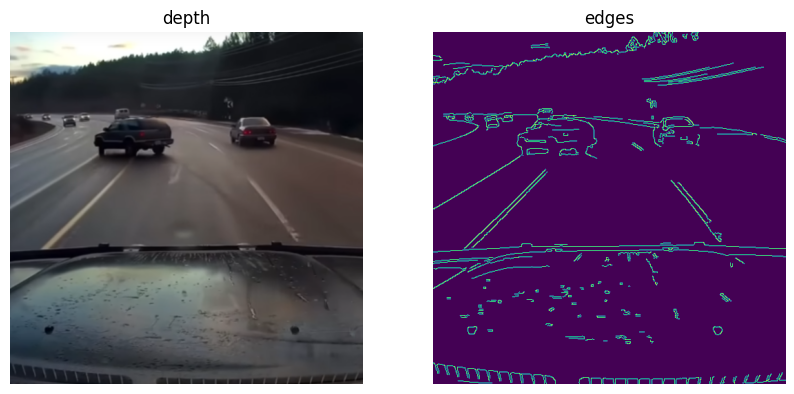

float64 0.0 1.0


In [26]:
plt.figure(figsize=(10, 10))


plt.subplot(121)
plt.title('depth')
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
plt.title('edges')
plt.imshow(edges)
plt.axis('off')
plt.show()

print(edges.dtype, np.min(edges), np.max(edges))

Global seed set to 1213456789


[CONTROL CORRECTION OF ControlledDiffusionEngine SCALED WITH 0.97]


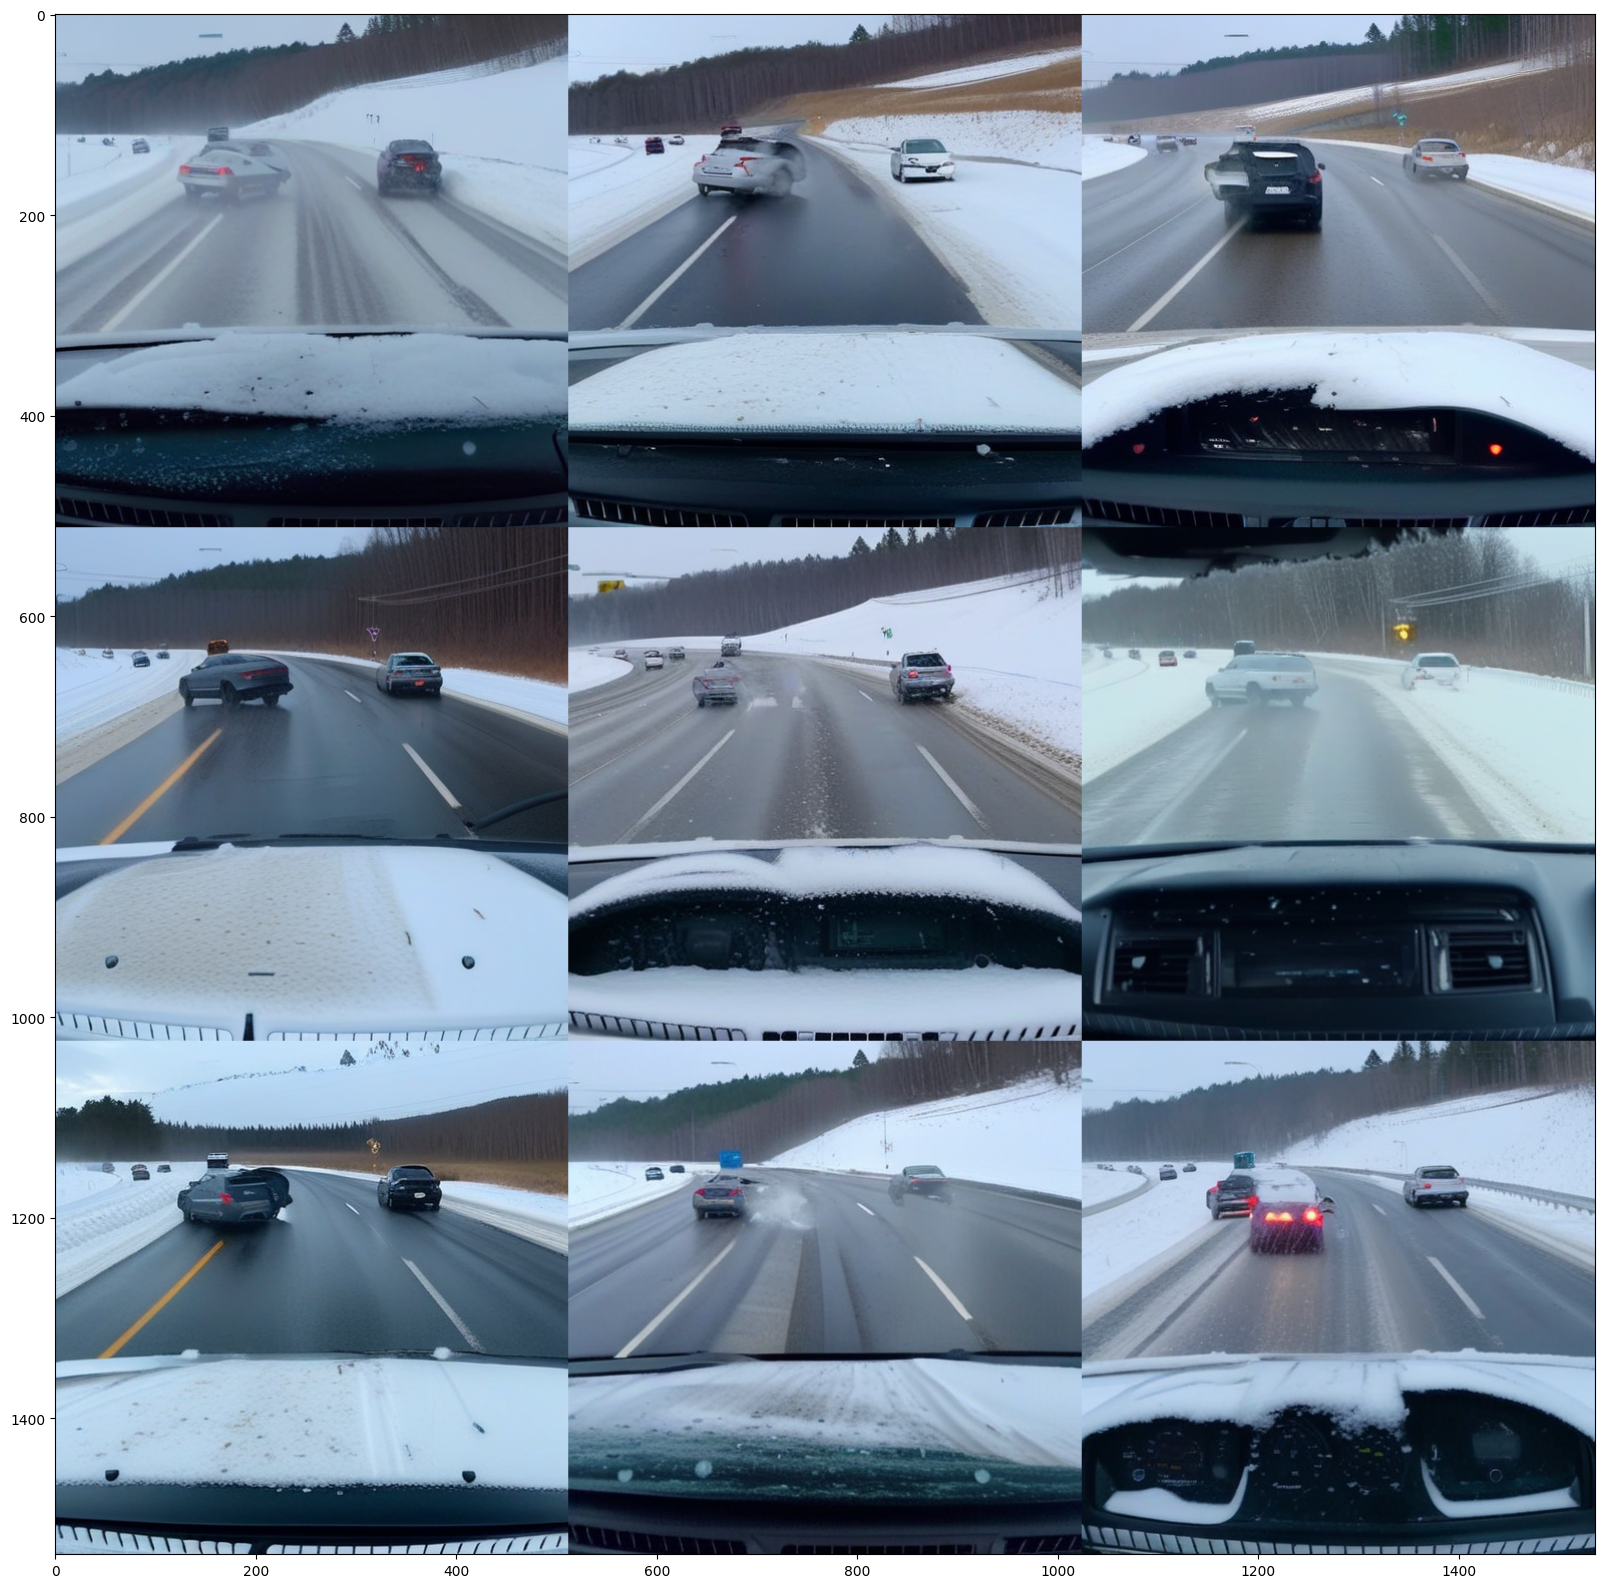

In [47]:
reload(cu)

samples, controls = cu.get_sdxl_sample(
    guidance=edges,
    ddim_steps=25,
    num_samples=9,
    model=model,
    seed=1213456789,
    shape=[4, size // 8, size // 8],
    control_scale=0.97,
    prompt="Dashcam footage of a car sliding sideways, losing control on a highway. Highly detailed, 4k image, sharp image, professional photograph, winter, snow, cold",
    n_prompt='low quality, cartoon, animation, plastic, cgi, blurry, drawing, render, art, motion blur, depth of field',
)
plt.figure(figsize=(20, 20))
plt.imshow(cu.create_image_grid(samples))
plt.show()


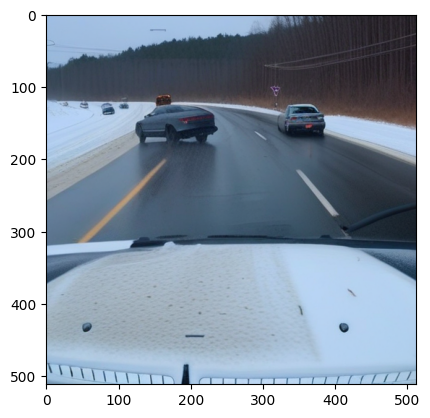

In [48]:
sampe_name = 'Generation_car_loosing_control_alt_snow'
good = samples[3]


plt.imshow(good)
plt.show()

to_save = Image.fromarray(good)
to_save.save('/export/data/ffeiden/Kritische_Szenarien/Generations/'+sampe_name+'.png')